In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [2]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

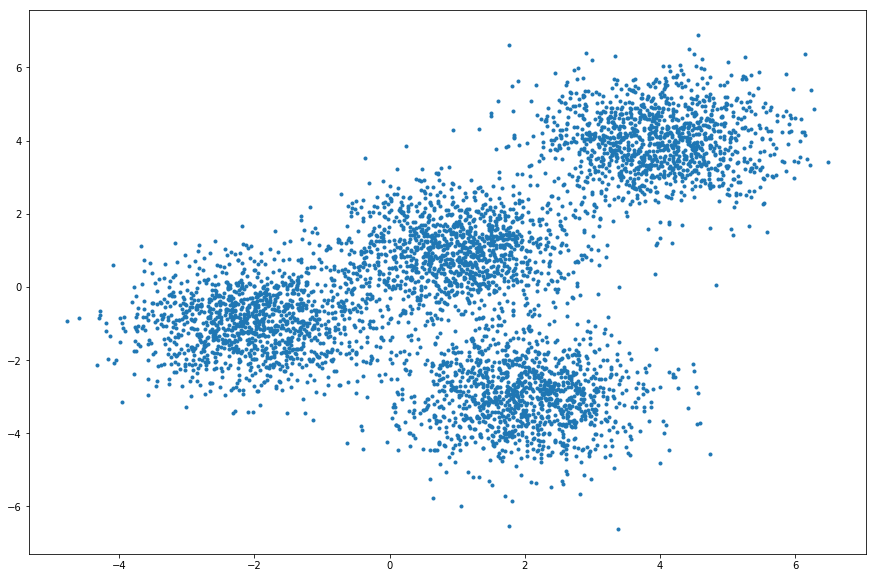

In [5]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [17]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=20)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
k_means.labels_

array([2, 3, 3, ..., 1, 0, 2])

In [19]:
k_means.cluster_centers_

array([[ 3.97147874,  4.00064153],
       [-2.01315318, -0.99405089],
       [ 0.99563268,  0.99974074],
       [ 1.97366383, -3.01908203]])

In [20]:
df = pd.read_csv('D:\customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [21]:
df.drop('Address',axis=1,inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [26]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 2 1 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 1 2 2 0 0 0 0 0 0 2 1 0 0 0 1
 1 0 2 1 2 0 2 0 2 0 0 0 0 2 2 1 0 1 1 1 0 0 0 2 0 2 2 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 2 0 0 1 2 0 2 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1
 0 0 0 2 1 0 0 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 2 1
 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 2 0 1 0 0 1 0 2 0 1 0 0 0 0 0 1 1 2 0 0 1 2
 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 1 0 1 0
 0 0 2 0 1 2 1 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0
 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 2 1
 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 0 1 0 0 0 2 2 0
 1 0 2 1 1 0 0 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 1 1
 2 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 0 0 0 2 0 0 0 0 2
 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 1 0
 1 0 0 0 0 0 2 1 1 0 2 0 

In [28]:
df['Labels'] = labels
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2
6,7,38,2,4,56,0.442,0.454,0.0,1.6,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0
8,9,26,1,5,18,0.575,2.215,NaN,15.5,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,2


In [29]:
df['Labels'].value_counts()

0    537
1    166
2    147
Name: Labels, dtype: int64

In [33]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
